In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [20]:
"""
id 고유 id
hour 시간
temperature 기온
precipitation 비가 오지 않았으면 0, 비가 오면 1
windspeed 풍속(평균)
humidity 습도
visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
ozone 오존
pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
count 시간에 따른 따릉이 대여 수
"""

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

In [21]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [23]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [24]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [25]:
mean_target = train['count'].mean()
mean_target

108.56339958875942

In [26]:
column_names = ['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X = train[column_names]
y = train['count']

In [13]:
# model = LinearRegression()

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


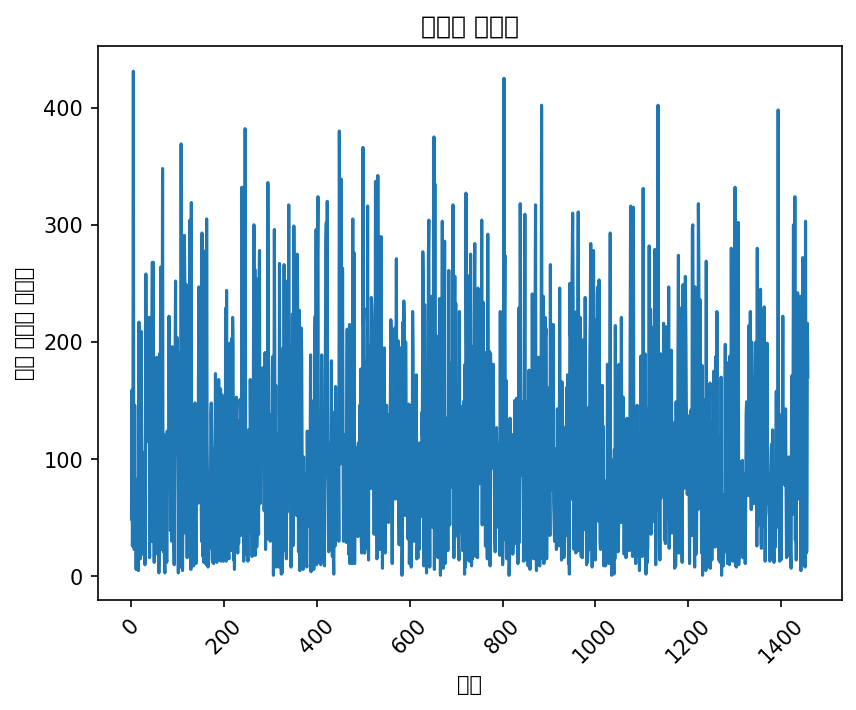

In [31]:
# 일별 따릉이 대여량 데이터 시각화

plt.figure(dpi=150)
x = train['count'].index
y = train['count'].values

plt.title("따릉이 대여량")
plt.xlabel('일별')
plt.xticks(rotation=45)
plt.ylabel('일별 따릉이 대여량')

plt.plot(x, y)
plt.show()

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) mis

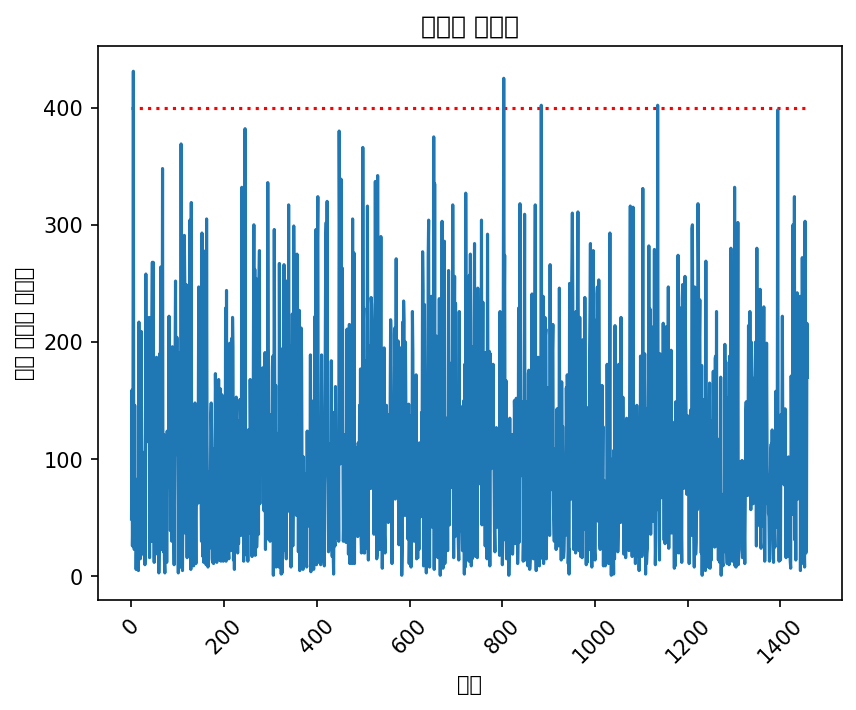

In [37]:
# 일별 따릉이 대여량 이상치 시각화

plt.figure(dpi=150)
x = train['count'].index
y = train['count'].values

plt.title("따릉이 대여량")
plt.xlabel('일별')
plt.xticks(rotation=45)
plt.ylabel('일별 따릉이 대여량')
plt.hlines(y=400, xmin=0, xmax=len(x), color='red', linestyle='dotted')
plt.plot(x, y)
plt.show()

In [39]:
# train 데이터프레임(DataFrame)에서 이상치가 아닌 평균값 추출

train[train['count'] <= 400].mean()

id                        1106.007560
hour                        11.475601
hour_bef_temperature        16.689264
hour_bef_precipitation       0.031659
hour_bef_windspeed           2.476487
hour_bef_humidity           52.301445
hour_bef_visibility       1403.777701
hour_bef_ozone               0.039099
hour_bef_pm10               57.210102
hour_bef_pm2.5              30.348768
count                      107.720962
dtype: float64

/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ihaeyeong/Library/Python/3.9/lib/python/site-pack

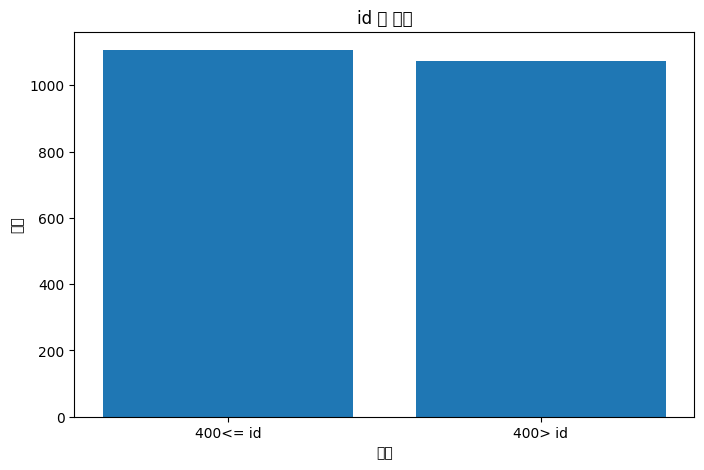

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


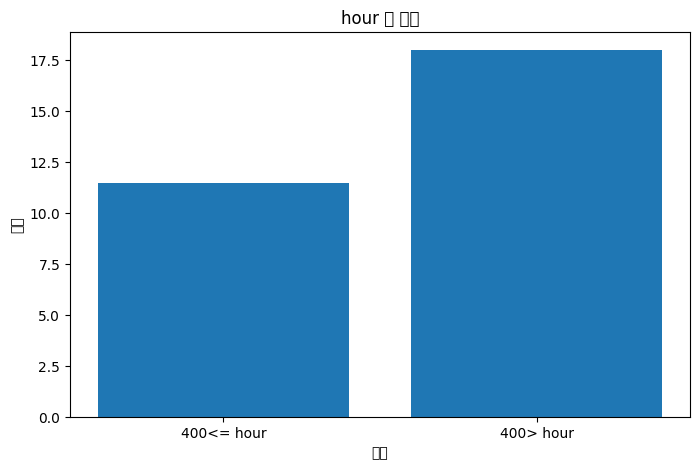

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


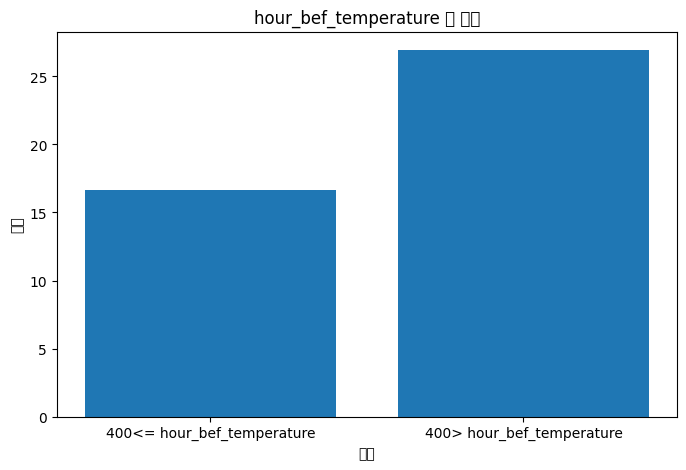

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


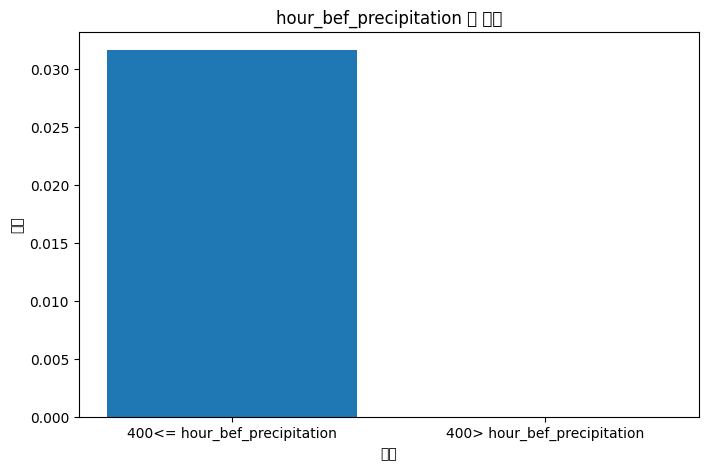

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


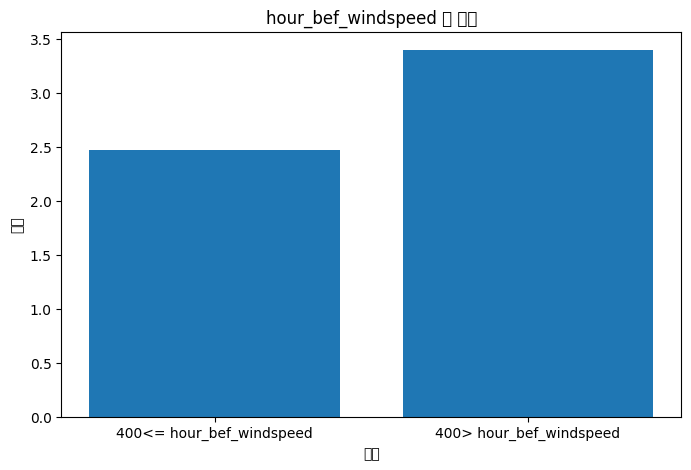

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


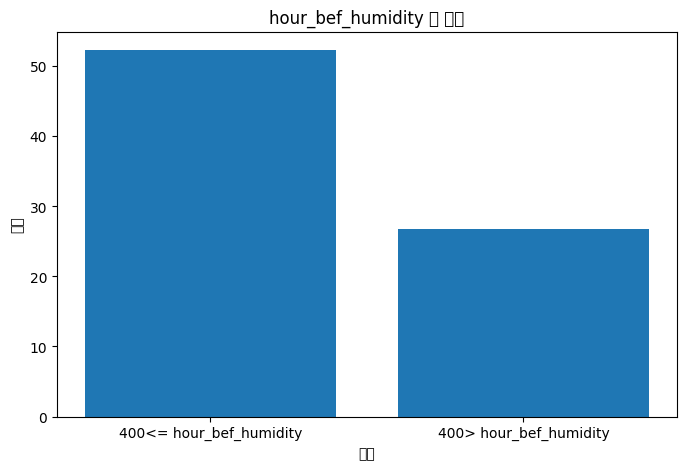

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


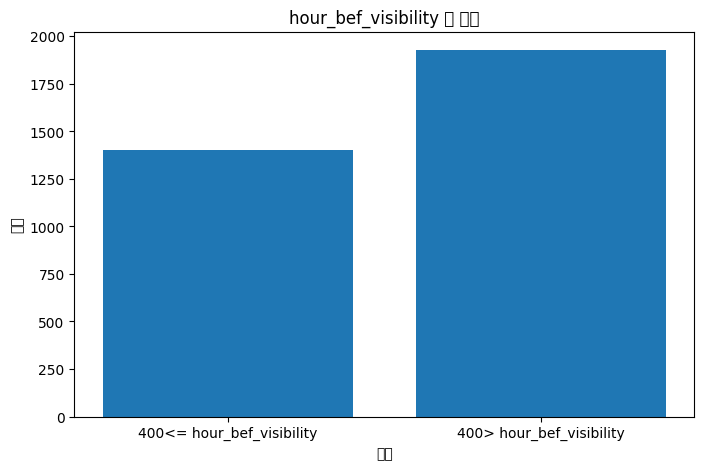

findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.
findfont: Font family 'NotoSansKR' not found.


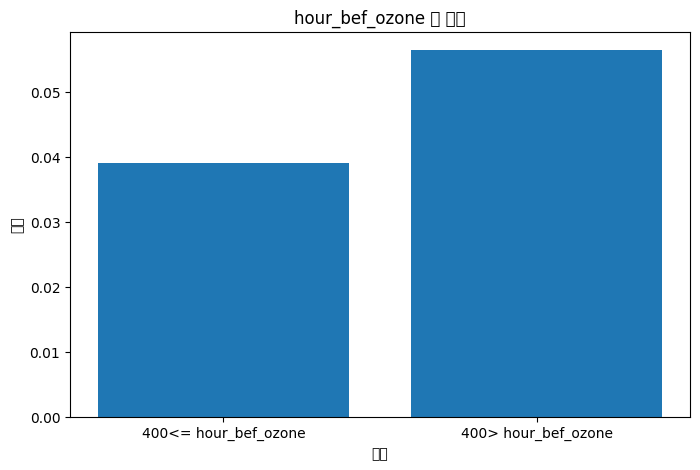

In [40]:
low = train[train['count']<=400].mean()
high = train[train['count']>400].mean()

def compare(idx):
    x = ['400<= '+low.index[idx], '400> '+low.index[idx]]
    y = [low.values[idx], high.values[idx]]

    plt.figure(figsize = (8,5))
    plt.title(low.index[idx]+" 의 평균")
    plt.xlabel('피쳐')
    plt.ylabel('수치')
    plt.bar(x, y)
    plt.show()
    
for i in range(8):
    compare(i)

In [ ]:
# hour_bef_precipitation / hour_bef_humidity

# 일별 강수 형태 (hour_bef_precipitation)